# IDS - Self-Organizing maps

In [1]:
# This is the visualization and implementation part of the IDS, using SOM 

In [2]:
import ids_utils, ids_metrics

In [3]:
import numpy as np
from minisom import MiniSom
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

C:\Users\cristi\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Minisom test

In [4]:
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]     

In [5]:
som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
print("Training...")
som.train_random(data, 100) # trains the SOM with 100 iterations
print("...ready!")

Training...
...ready!


In [6]:
som.activation_response(np.array(data))

array([[0., 7., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

# Analysis of the dataset

In [53]:
df = ids_utils.load_ids_df('./data/kddcup.data_10_percent_corrected.csv')

In [54]:
len(df.columns)

42

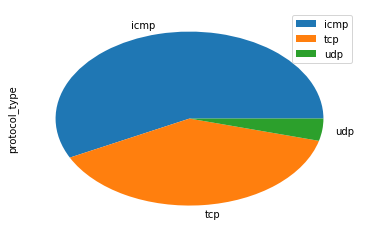

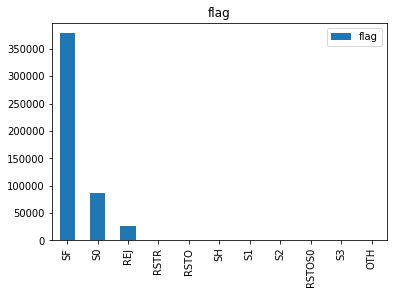

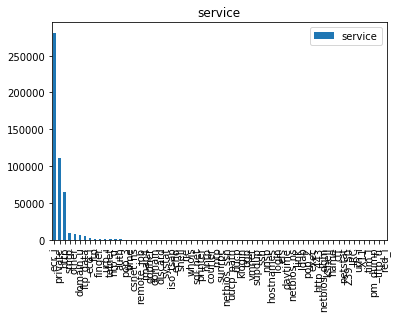

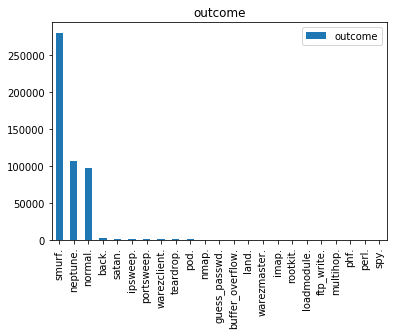

In [55]:
protocol_df = pd.DataFrame(df['protocol_type']).apply(pd.value_counts)
protocol_df.plot.pie(subplots=True)
plt.show()

plt.figure(figsize=(20,20))
pd.DataFrame(df['flag']).apply(pd.value_counts).plot.bar(subplots=True)
plt.show()

plt.figure(figsize=(20,20))
pd.DataFrame(df['service']).apply(pd.value_counts).plot.bar(subplots=True)
plt.show()

plt.figure(figsize=(20,20))
pd.DataFrame(df['outcome']).apply(pd.value_counts).plot.bar(subplots=True)
plt.show()

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,0.010551,0.007793,2.012720,0.096416,0.011020,0.036482,0.0,0.0,0.037211,213.147129,246.322733,0.380717,0.381017,0.231624,0.232147,0.388190,0.082206,0.142398,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,2.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [57]:
# encode the categorical columns
ids_utils.encode_dummy_variables(df, 'protocol_type')

In [58]:
ids_utils.encode_dummy_variables(df, 'service')
ids_utils.encode_dummy_variables(df, 'flag')

In [59]:
df.dtypes

duration                int64
src_bytes               int64
dst_bytes               int64
land                    int64
wrong_fragment          int64
urgent                  int64
hot                     int64
num_failed_logins       int64
logged_in               int64
num_compromised         int64
root_shell              int64
su_attempted            int64
num_root                int64
num_file_creations      int64
num_shells              int64
num_access_files        int64
num_outbound_cmds       int64
is_host_login           int64
is_guest_login          int64
count                   int64
srv_count               int64
serror_rate           float64
srv_serror_rate       float64
rerror_rate           float64
srv_rerror_rate       float64
same_srv_rate         float64
diff_srv_rate         float64
srv_diff_host_rate    float64
dst_host_count          int64
dst_host_srv_count      int64
                       ...   
service-remote_job      uint8
service-rje             uint8
service-sh

In [61]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'uint8'])

In [62]:
numeric_df.dtypes

duration                int64
src_bytes               int64
dst_bytes               int64
land                    int64
wrong_fragment          int64
urgent                  int64
hot                     int64
num_failed_logins       int64
logged_in               int64
num_compromised         int64
root_shell              int64
su_attempted            int64
num_root                int64
num_file_creations      int64
num_shells              int64
num_access_files        int64
num_outbound_cmds       int64
is_host_login           int64
is_guest_login          int64
count                   int64
srv_count               int64
serror_rate           float64
srv_serror_rate       float64
rerror_rate           float64
srv_rerror_rate       float64
same_srv_rate         float64
diff_srv_rate         float64
srv_diff_host_rate    float64
dst_host_count          int64
dst_host_srv_count      int64
                       ...   
service-remote_job      uint8
service-rje             uint8
service-sh

In [35]:
for col in numeric_df.columns:
    ids_utils.encode_numeric_zscore(numeric_df, col)

D:\projects\ma-project\ids_utils.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[name] = (df[name] - mean) / sd


In [63]:
numeric_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type-icmp,protocol_type-tcp,protocol_type-udp,service-IRC,service-X11,service-Z39_50,service-auth,service-bgp,service-courier,service-csnet_ns,service-ctf,service-daytime,service-discard,service-domain,service-domain_u,service-echo,service-eco_i,service-ecr_i,service-efs,service-exec,service-finger,service-ftp,service-ftp_data,service-gopher,service-hostnames,service-http,service-http_443,service-imap4,service-iso_tsap,service-klogin,service-kshell,service-ldap,service-link,service-login,service-mtp,service-name,service-netbios_dgm,service-netbios_ns,service-netbios_ssn,service-netstat,service-nnsp,service-nntp,service-ntp_u,service-other,service-pm_dump,service-pop_2,service-pop_3,service-printer,service-private,service-red_i,service-remote_job,service-rje,service-shell,service-smtp,service-sql_net,service-ssh,service-sunrpc,service-supdup,service-systat,service-telnet,service-tftp_u,service-tim_i,service-time,service-urh_i,service-urp_i,service-uucp,service-uucp_path,service-vmnet,service-whois,flag-OTH,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.0,494020.0,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,0.000111,0.000036,0.011352,0.001083,0.000109,0.001008,0.0,0.0,0.001387,332.286347,292.907133,0.176687,0.176609,0.057434,0.057719,0.791547,0.020982,0.028997,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412,0.574070,0.384729,0.041201,0.000087,0.000022,0.000186,0.000664,0.000215,0.000219,0.000255,0.000196,0.000208,0.000235,0.000235,0.011868,0.000227,0.003324,0.569613,0.000208,0.000200,0.001356,0.001615,0.009556,0.000237,0.000211,0.130140,0.000200,0.000237,0.000233,0.000215,0.000198,0.000204,0.000206,0.000

In [64]:
train_data = ids_utils.df_to_tf_matrix(numeric_df)

In [65]:
som = MiniSom(20, 20, len(numeric_df.columns), sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
print("Training...")
som.train_random(train_data, 1000) # trains the SOM with 100 iterations
print("...ready!")

Training...
...ready!


In [66]:
target = ids_utils.get_label_column('./data/kddcup.data_10_percent_corrected.csv')
target_df = pd.DataFrame(target)
target_df.columns = ['label']
target_df.apply(pd.value_counts)

,label
smurf.,280790
neptune.,107201
normal.,97278
back.,2203
satan.,1589
ipsweep.,1247
portsweep.,1040
warezclient.,1020
teardrop.,979
pod.,264


In [67]:
target = df['outcome'].as_matrix()

In [68]:
np.shape(target)

(494020,)

In [69]:
target = np.reshape(target, (len(target), 1))
train_data_and_label = np.hstack((train_data, target))

In [70]:
list_train_data = train_data_and_label.tolist()

In [71]:
len(list_train_data[0])

119

In [73]:
list_train_data[0][-1]

'normal.'

In [74]:
%time winners_per_node = ids_utils.map_winner_neurons(som, list_train_data)

Wall time: 11min 4s


In [75]:
winners_per_node

[[{'smurf.': 193093},
  {},
  {'smurf.': 549},
  {'smurf.': 26185},
  {'smurf.': 141},
  {'smurf.': 7234},
  {'normal.': 1, 'smurf.': 19},
  {'normal.': 14, 'rootkit.': 1, 'smurf.': 16},
  {'ipsweep.': 1, 'normal.': 10, 'smurf.': 8267},
  {'normal.': 1, 'smurf.': 3788},
  {'ipsweep.': 1, 'normal.': 2, 'smurf.': 6258},
  {'normal.': 2, 'smurf.': 787},
  {'imap.': 8, 'ipsweep.': 18, 'nmap.': 2, 'smurf.': 33633},
  {'nmap.': 1, 'normal.': 3},
  {'land.': 1, 'neptune.': 62, 'portsweep.': 10, 'satan.': 1305},
  {},
  {},
  {},
  {},
  {}],
 [{},
  {'smurf.': 2},
  {'smurf.': 1},
  {},
  {'smurf.': 103},
  {'normal.': 7, 'smurf.': 114},
  {'ipsweep.': 1, 'normal.': 24, 'smurf.': 184},
  {'normal.': 2},
  {},
  {'neptune.': 12821, 'teardrop.': 20},
  {'land.': 1, 'neptune.': 6, 'normal.': 29},
  {},
  {'normal.': 10},
  {'neptune.': 3979},
  {'neptune.': 2285, 'portsweep.': 14, 'satan.': 21},
  {'neptune.': 6868},
  {},
  {},
  {},
  {}],
 [{},
  {},
  {},
  {'smurf.': 268},
  {'normal.': 95}

In [76]:
def get_keys_sum(d, keys):
    s = 0
    for k in keys:
        s += d[k]
    return s

def get_malicious_or_not(d):
    mal_keys = list(filter(lambda k: k != 'normal.', d.keys()))
    mal_sum = get_keys_sum(d, mal_keys)
    normal_sum = 0
    if 'normal.' in d.keys():
        normal_sum = d['normal.']
    if mal_sum == 0 or normal_sum / mal_sum > 0.5:
        return 'normal.'
    else:
        return 'malicious.'
    

def decide_if_neurons_malicious(winner_cols):
    res = []
    for i in range(len(winner_cols)):
        res.append([])
        for j in range(len(winner_cols[i])):
            d = winner_cols[i][j]
            if len(d) == 0:
                res[i].append('normal.')
            else:
                key = max(d, key=d.get)
                res[i].append(get_malicious_or_not(d))
    return res
                
            
            
malicious_neurons = decide_if_neurons_malicious(winners_per_node)

In [77]:
malicious_neurons

[['malicious.',
  'normal.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'normal.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'normal.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.',
  'normal.',
  'normal.'],
 ['normal.',
  'malicious.',
  'malicious.',
  'normal.',
  'malicious.',
  'malicious.',
  'malicious.',
  'normal.',
  'normal.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.',
  'malicious.',
  'malicious.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.',
  'normal.'],
 ['normal.',
  'normal.',
  'normal.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.',
  'normal.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.'],
 ['normal.',
  'normal.',
  'normal.',
  'normal.',
  'malicious.',
  'normal.',
  'normal.',
  'normal.',
  'malicious.',
 

In [ ]:
metrics = ids_metrics.test_som_and_get_stats(som, malicious_neurons, train_data_and_label)
print("Acc: {}".format(metrics.get_accuracy()))

# Performance evaluation

In [34]:
metrics.tp

393849

In [36]:
metrics.fp / metrics.size

0.0026092061050159913

In [37]:
metrics.fn / metrics.size

0.005858062426622404

In [39]:
print('False alarm rate: {}%'.format(metrics.get_false_alarm_rate()*100))
print('Detection rate: {}%'.format(metrics.get_detection_rate()*100))
print("Acc: {}".format(metrics.get_accuracy()))

False alarm rate: 0.7294394608096425%
Detection rate: 99.27056053919036%
Acc: 0.9915327314683616


# Test data performance

In [40]:
import ids_utils

In [64]:
testdf = ids_utils.load_ids_df('./data/test_data.csv')
print(np.shape(testdf))
testdf.head()

(311028, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [66]:
testdf.columns[0]

'duration'

In [77]:
test_data = ids_utils.df_to_tf_matrix(testdf.select_dtypes(include=['float64', 'int64']))
test_data_with_labels = ids_utils.append_label_column(test_data, testdf)

print('Running SOM on the test data...')
%time winners = ids_utils.map_winner_neurons(som, test_data_with_labels)
test_mal_neurons = decide_if_neurons_malicious(winners)

print('Getting metrics...')
%time test_metrics = ids_metrics.test_som_and_get_stats(som, test_mal_neurons, test_data_with_labels)
print("Acc: {}".format(test_metrics.get_accuracy()))

(311028,)
Data  (311028, 38)
Target  (311028, 1)


C:\Users\cristi\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Wall time: 6min 42s
Wall time: 4min 52s
Acc: 0.957958768985429


In [80]:
print("DR: {}%".format(test_metrics.get_detection_rate()*100))
print("FAR: {}%".format(test_metrics.get_false_alarm_rate()*100))

DR: 96.01335271286877%
FAR: 3.9866472871312433%
